# Principal Component Analysis Assignment

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Import the [PitchFX data set](https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv).

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79931 entries, 0 to 79930
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gameString          79931 non-null  object 
 1   gameDate            79931 non-null  object 
 2   visitor             79931 non-null  object 
 3   home                79931 non-null  object 
 4   inning              79931 non-null  int64  
 5   side                79931 non-null  object 
 6   balls               79931 non-null  int64  
 7   strikes             79931 non-null  int64  
 8   outs                79931 non-null  int64  
 9   batterId            79931 non-null  int64  
 10  batterName          79931 non-null  object 
 11  batterHand          79931 non-null  object 
 12  batterPosition      79931 non-null  object 
 13  pitcherId           79931 non-null  int64  
 14  pitcherName         79931 non-null  object 
 15  pitcherHand         79931 non-null  object 
 16  time

In [3]:
# I use describe to separate the numeric variables from objects
df.describe()

,inning,balls,strikes,outs,batterId,pitcherId,timesFaced,catcherId,umpireId,probCalledStrike,releaseVelocity,spinRate,spinDir,locationHoriz,locationVert,movementHoriz,movementVert,battedBallAngle,battedBallDistance
count,79931.000000,79931.000000,79931.000000,79931.000000,79931.000000,79931.000000,79931.000000,79931.000000,79931.000000,79921.000000,79931.000000,73734.000000,79620.000000,79931.000000,79931.000000,79931.000000,79931.000000,14499.000000,14499.000000
mean,4.969649,0.877307,0.881235,0.980596,507785.111584,519154.623187,1.572919,496808.823585,449740.465914,0.471829,88.124128,2201.378164,182.118389,-0.021314,2.236719,-0.631383,4.943900,2.487668,204.409772
std,2.636662,0.963903,0.824691,0.814120,81404.451063,75568.779512,0.785469,68989.060380,35091.213532,0.426118,6.033272,318.365005,62.942123,0.868630,0.939513,6.279931,5.261177,27.697504,101.883735
min,1.000000,0.000000,0.000000,0.000000,112526.000000,112526.000000,0.000000,150229.000000,427013.000000,0.000000,43.100000,159.043000,0.009908,-4.494000,-2.907000,-17.110000,-16.210000,-176.380000,2.500000
25%,3.000000,0.000000,0.000000,0.000000,455117.000000,457918.000000,1.000000,455117.000000,427164.000000,0.005000,84.100000,2062.022500,145.225000,-0.620000,1.640000,-5.990000,2.140000,-20.550000,117.770000
50%,5.000000,1.000000,1.000000,1.000000,518466.000000,519144.000000,1.000000,489365.000000,427413.000000,0.424000,89.500000,2236.790000,195.501000,-0.013000,2.246000,-1.390000,6.020000,1.460000,212.680000
75%,7.000000,1.000000,2.000000,2.000000,571976.000000,592330.000000,2.000000,543228.000000,483561.000000,0.951000,92.700000,2396.830000,222.405500,0.582000,2.844000,4.470000,8.860000,25.845000,280.645000
max,14.000000,3.000000,2.000000,2.000000,666560.000000,664641.000000,4.000000,623143.000000,594151.000000,1.000000,105.000000,3472.370000,359.992000,3.970000,6.860000,20.420000,17.850000,178.210000,554.630000


### Keep only the pitch type and the numeric columns (exluding ID fields).

* Drop any remaining records that contain null values.
* Consider `pitchType` as `y`/target and the remaining columns to be `X`/features.

In [4]:
#Since I could not find a more sophistaced way, I just copy pasted the numeric variable excluding the ids
dff = df[['inning', 'balls', 'strikes', 'outs', 'probCalledStrike', 'timesFaced', 'releaseVelocity', 'spinRate', 'spinDir',
          'locationHoriz', 'locationVert', 'movementHoriz', 'movementVert', 'battedBallAngle', 'battedBallDistance', 'pitchType']]
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79931 entries, 0 to 79930
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inning              79931 non-null  int64  
 1   balls               79931 non-null  int64  
 2   strikes             79931 non-null  int64  
 3   outs                79931 non-null  int64  
 4   probCalledStrike    79921 non-null  float64
 5   timesFaced          79931 non-null  int64  
 6   releaseVelocity     79931 non-null  float64
 7   spinRate            73734 non-null  float64
 8   spinDir             79620 non-null  float64
 9   locationHoriz       79931 non-null  float64
 10  locationVert        79931 non-null  float64
 11  movementHoriz       79931 non-null  float64
 12  movementVert        79931 non-null  float64
 13  battedBallAngle     14499 non-null  float64
 14  battedBallDistance  14499 non-null  float64
 15  pitchType           79931 non-null  object 
dtypes: f

In [5]:
#I am checking the for null values
dff.isnull().sum().loc[lambda x: x > 0]
#I dropped variables wiht null values
dff.drop(['probCalledStrike', 'spinRate', 'spinDir', 'battedBallAngle', 'battedBallDistance'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
dff.info()
#ended up ith exactly 10 variables, after 10 minutes of data cleaning 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79931 entries, 0 to 79930
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   inning           79931 non-null  int64  
 1   balls            79931 non-null  int64  
 2   strikes          79931 non-null  int64  
 3   outs             79931 non-null  int64  
 4   timesFaced       79931 non-null  int64  
 5   releaseVelocity  79931 non-null  float64
 6   locationHoriz    79931 non-null  float64
 7   locationVert     79931 non-null  float64
 8   movementHoriz    79931 non-null  float64
 9   movementVert     79931 non-null  float64
 10  pitchType        79931 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 6.7+ MB


In [7]:
#lastly create X and Y
X = dff.drop('pitchType', axis=1)

Y = dff.pitchType

### Reduce the dimensionality of the data using PCA to two components.

Don't forget to scale.

In [8]:
#instiate scale
scale = StandardScaler()
#create new dataframe for scaled values, using same index and columns as original dataframe
X_ = pd.DataFrame(
    scale.fit_transform(X), index=X.index, columns=X.columns
)

In [9]:
pca = PCA(n_components=2)

X_pca = pd.DataFrame(pca.fit_transform(X_), index=X_.index)

### Compute the explained variance for new data set.

In [11]:
print(pca.explained_variance_)

[2.02793766 1.38269509]


In [12]:
print(pca.components_)

[[-5.79888599e-03 -6.98660141e-02  8.30212661e-02  2.51087441e-02
   1.24145762e-01 -6.13364600e-01  1.27493216e-01 -3.28454977e-01
   3.36399747e-01 -5.98858789e-01]
 [ 1.38053189e-02  7.04427015e-01  7.03118374e-01  3.11882898e-02
  -3.47063895e-02  4.98430199e-02  4.37559794e-02 -5.04538701e-02
   9.71358456e-03  6.65901013e-04]]


In [17]:
X_pca

,0,1
0,-1.767217,-1.439797
1,-1.881270,-0.543723
2,-1.534806,0.361475
3,-1.661333,-1.342050
4,-1.620792,-0.476940
...,...,...
79926,-1.024129,0.294293
79927,-1.453272,1.026143
79928,0.063950,1.846168
79929,-1.034333,1.949681


### Generate a scatter plot that visualizes how the component values are distributed.

In [18]:
pca_1 = X_pca.loc[:, 0]
pca_2 = X_pca.loc[:, 1]

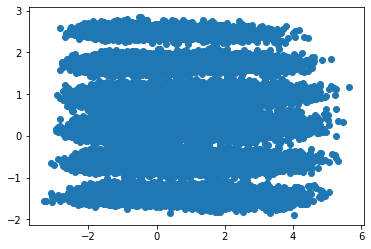

In [21]:
plt.scatter(pca_1, pca_2)
plt.show()

In [22]:
#This could be a good way to plot how the componenet values are distributed for a different assignment
'''def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X_pca.loc[:, 0], X_pca.loc[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');'''

"def draw_vector(v0, v1, ax=None):\n    ax = ax or plt.gca()\n    arrowprops=dict(arrowstyle='->',\n                    linewidth=2,\n                    shrinkA=0, shrinkB=0)\n    ax.annotate('', v1, v0, arrowprops=arrowprops)\n\n# plot data\nplt.scatter(X_pca.loc[:, 0], X_pca.loc[:, 1], alpha=0.2)\nfor length, vector in zip(pca.explained_variance_, pca.components_):\n    v = vector * 3 * np.sqrt(length)\n    draw_vector(pca.mean_, pca.mean_ + v)\nplt.axis('equal');"

### Create a line plot that shows the explained variance by number of components.

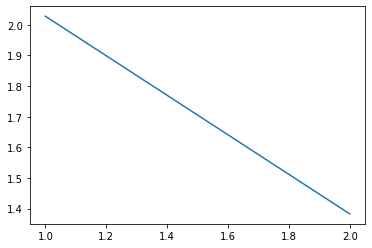

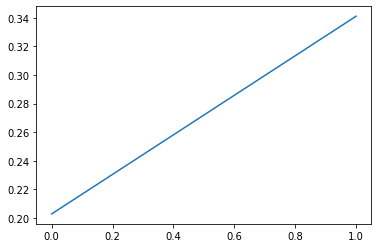

In [23]:
plt.plot([1, 2], pca.explained_variance_)
plt.show()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

### Iteratively train and score a Random Forest Classifier (to predict `pitchType`).

* In each iteration:
    * Increase the number of principal components (start with `2`)
    * Store the number of components and model score

In [25]:
model = RandomForestClassifier(max_depth=4, random_state=1)

In [26]:
scores = []
n_components = list(range(1, len(X.columns)))
for i in n_components:
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_)
    model.fit(X_pca, Y)
    score = model.score(X_pca, Y)
    scores.append(score)

### Create a line plot that shows the training scores across the different numbers of principal components.

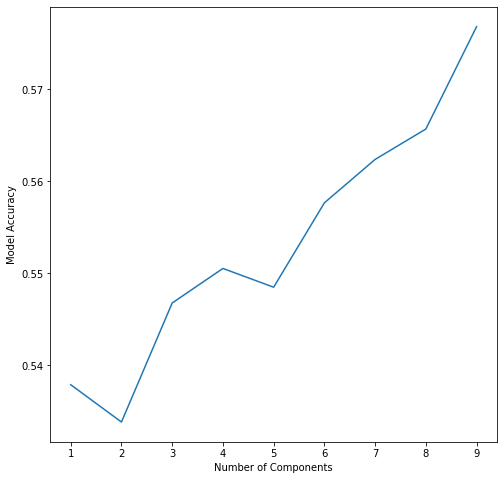

In [27]:
plt.figure(figsize=(8, 8))
plt.plot(n_components, scores)
plt.xlabel("Number of Components")
plt.ylabel("Model Accuracy")
plt.show()

### Based on the analysis you conducted, what is the optimal number of principal components?

In [28]:
# There is only 4% differnce between 1 component and 9. That being said, in the graph 9 compnenet has the 
# highest explained variance. However, depending on the context, in a small dataset I would go with one or two 
# since they are almost as good as 9, meanwhile, in a large dataset if even 4% differnce make a great impact
# on the outcome, then I would choose 9.